# Data Analysis Project: Ecommerce Customer Behaviour

## Data Overview

<b> Calling libraries

In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.preprocessing 
import seaborn as sns
import kaggle
from zipfile import ZipFile

In [31]:
df = pd.read_csv('ecommerce_customer_data_large.csv').copy()
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [33]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [34]:
df.describe(include='O')

,Purchase Date,Product Category,Payment Method,Customer Name,Gender
count,250000,250000,250000,250000,250000
unique,249728,4,3,39878,2
top,2020-10-16 09:27:42,Electronics,Credit Card,Michael Johnson,Male
freq,2,62630,83547,119,125676


In [35]:
df.duplicated().sum()

0

There is no duplicated data row

In [36]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

There's a feature 'Returns' having 47382 null values on total of 250,000 data rows. <br>
I've checked the description on Kaggle again, null values on Returns stand for non-return orders, so I will fill null with 0 (no return)

In [39]:
# Fill null values with 0 (no-return orders)
df.Returns.fillna(0,inplace=True)

I think Customer Name has no value here so I'll drop it for saving memory and speeding up code

In [40]:
df.drop('Customer Name',axis=1, inplace=True)

In [42]:
# Check if Customer Name has been removed or not
if 'Customer Name' in df.columns:
    print('No')
else:
    print('Yes')

Yes


We also need to change Purchase Date column into datetime

In [59]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [49]:
# Print all categorical features
for label in df.columns:
    if df[label].dtype == 'object' and df[label].unique().shape[0] < 10:
        print(label, df[label].unique())

Product Category ['Home' 'Electronics' 'Books' 'Clothing']
Payment Method ['PayPal' 'Credit Card' 'Cash']
Gender ['Female' 'Male']


## Separate the data depend on Target value

In [88]:
df_not = df[df['Churn'] == 0]

df_ = df[df['Churn'] == 1]

print('Churn customer: ',len(df_['Customer ID'].unique()), 'customers')
print('Not churn customer: ',len(df_not['Customer ID'].unique()), 'customers')

Churn customer:  9929 customers
Not churn customer:  39732 customers


Notes for later analysis:
- Features with potential insights: Returns, Total Purchase amount, Product Category
- Question mark on: Purchase Date (is there any seasonal trends?), Customer Age
- Relationship between Total Purchase Amount and Churn
- Relationship between Payment Method and Returns

## Exploratory Analysis - Questions

<b> 1- How Gender affect Customer Churn?

Text(0.5, 1.0, 'Ratio of Male and Female in Not Churn')

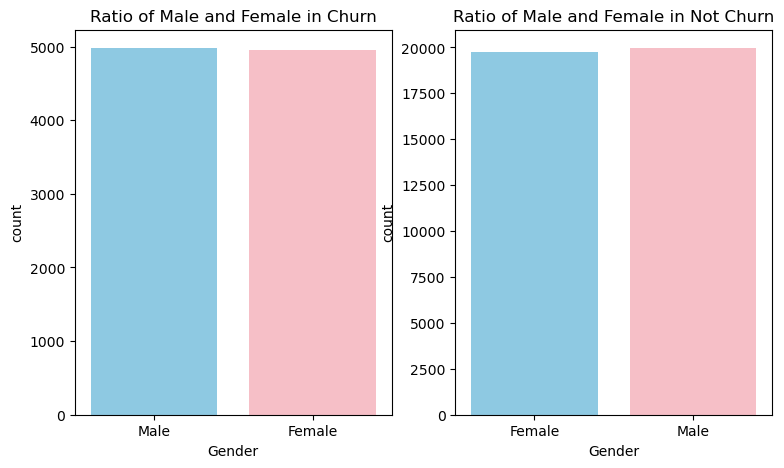

In [101]:
new_df_ = df_[['Customer ID','Gender','Churn']].drop_duplicates(subset='Customer ID')
new_df_not = df_not[['Customer ID','Gender','Churn']].drop_duplicates(subset='Customer ID')
plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
sns.countplot(data = new_df_, x='Gender', palette=['#80CFF0','#FFB6C1'])
plt.title('Ratio of Male and Female in Churn')

plt.subplot(1,2,2)
sns.countplot(data = new_df_not, x='Gender', palette=['#80CFF0','#FFB6C1'])
plt.title('Ratio of Male and Female in Not Churn')



Both count of Male and Female Customer are almost the same in Churn and Not Churn data set, which mean Gender has no effect on Churn

<b> 2- How is Churn affected by Payment Method

<Figure size 1000x500 with 0 Axes>

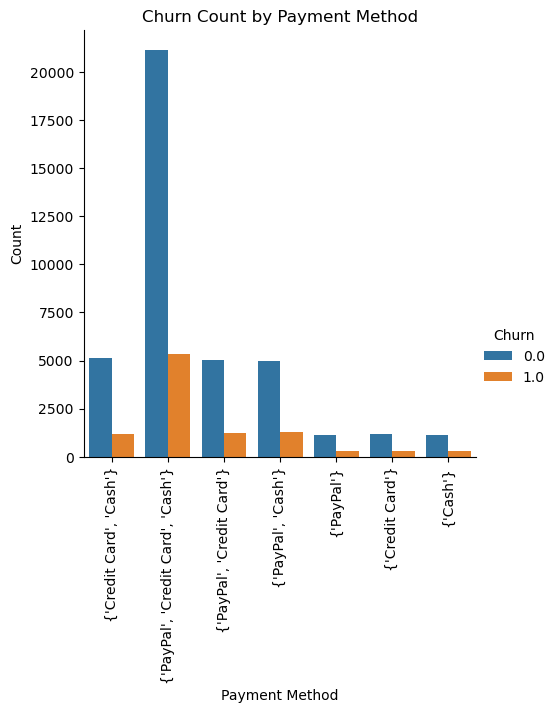

In [132]:
payment_df = df.groupby('Customer ID')[['Payment Method', 'Churn']].agg({'Payment Method': set, 'Churn': 'mean'}).reset_index()
payment_df['Payment Method'] = payment_df['Payment Method'].astype(str)
# payment_df_ = df_.groupby('Customer ID')[['Payment Method', 'Churn']].agg({'Payment Method': set, 'Churn': 'mean'}).reset_index()
# payment_df_not = df_not.groupby('Customer ID')[['Payment Method', 'Churn']].agg({'Payment Method': set, 'Churn': 'mean'}).reset_index()


plt.figure(figsize=(10,5))
plot = sns.catplot(data = payment_df, x = 'Payment Method', hue='Churn',kind='count')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Count by Payment Method')
plot.set_xticklabels(rotation=90)
plt.show()


Most of customer use all 3 payment method, but there's no differences in percentage of churn in 7 groups.

In [111]:
payment_df['Payment Method'].dtype

dtype('O')